In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yelp_user = pd.read_csv('C:/Users/Riley/Desktop/yelp_data/yelp_user.csv')

In [3]:
yelp_user.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


# User Summary Statistics

## Yelp User Accout Registration

After grouping yelp users by the number of accounts created per day in 7 day rolling averages, we use a lineplot to show the progression of created accounts between 2004 and 2017. When yelp was first created in 2004, it resulted in less than 100 accounts created per day for the first few years. However, account creations picked up significantly reaching as high as 700 in 2013.

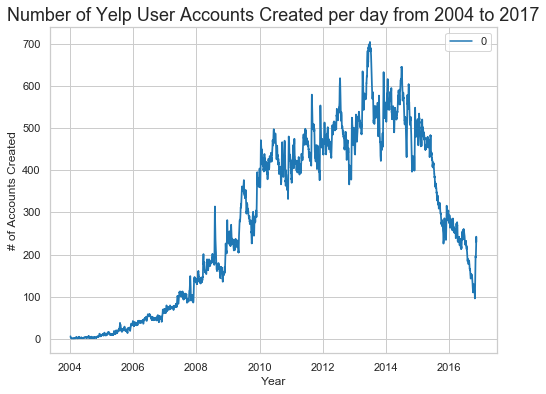

In [6]:
acct_created_perdate = yelp_user.groupby(['yelping_since']).size()
values = acct_created_perdate.tolist()
dates = pd.date_range('1 1 2004', periods = 4699, freq = 'D')

data = pd.DataFrame(values, dates)
data = data.rolling(7).mean()

fig = plt.figure(figsize=(8,6))
sns.set(style = 'whitegrid')
sns.lineplot(data=data, palette = 'tab10', linewidth = 1.75)
plt.title('Number of Yelp User Accounts Created per day from 2004 to 2017',fontsize = 18)
plt.xlabel('Year')
plt.ylabel('# of Accounts Created')
plt.show()

## How Many Reviews does an Average User Give?

In the plots below we examine the distribution of the amount of reviews per user in the dataset. To make better visuals, we cap the max number of reviews per user at 30. We see that roughly half of the users in our dataset have between 2 and 15 reviews. Users with 1 review show the highest frequency count at 244232 or 18% of reviews. This could be the cause of people creating accounts solely to leave a very good or bad review after recently visiting a business. We also see that accouts with 30 reviews or greater make up about 11% of reveiws.

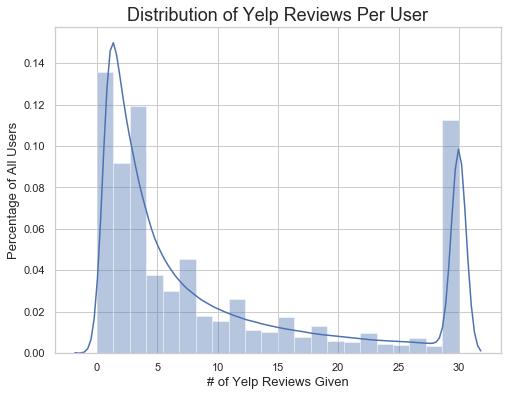

In [8]:
fig = plt.figure(figsize=(8,6))

temp_user_review_count = list(yelp_user['review_count'])
counter = 0
max_30 = []
for i in temp_user_review_count:
    if i > 30:
        max_30.append(30)
    else:
        max_30.append(i)
        
ax = sns.distplot(max_30, bins = 22)
plt.title('Distribution of Yelp Reviews Per User', fontsize = 18)
plt.xlabel('# of Yelp Reviews Given', fontsize = 13)
plt.ylabel('Percentage of All Users', fontsize = 13)
plt.show()

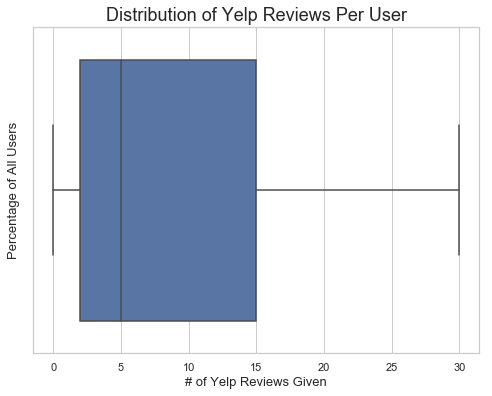

In [9]:
fig = plt.figure(figsize=(8,6))

ax = sns.boxplot(max_30)
plt.title('Distribution of Yelp Reviews Per User', fontsize = 18)
plt.xlabel('# of Yelp Reviews Given', fontsize = 13)
plt.ylabel('Percentage of All Users', fontsize = 13)
plt.show()

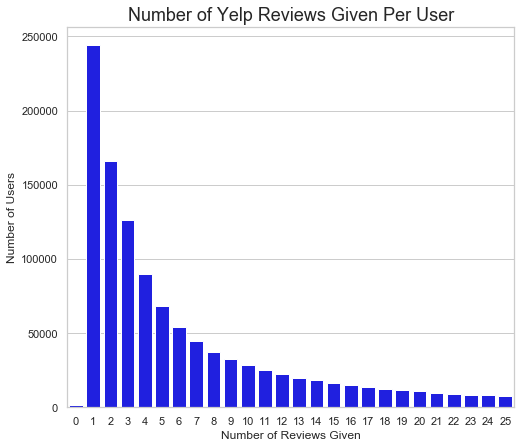

In [10]:
plt.figure(figsize=(8, 7))
sns.set(style = 'whitegrid')

review_df = pd.DataFrame(list(yelp_user.groupby(['review_count']).size())[0:50],list(range(50)))
ax = sns.barplot(x = list(range(26)), y = list(yelp_user.groupby(['review_count']).size())[0:26], color = 'blue')
plt.title('Number of Yelp Reviews Given Per User', fontsize = 18)
plt.xlabel('Number of Reviews Given')
plt.ylabel('Number of Users')
plt.show()